# Importar librerías

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Manejo de Datos

## Establecimientos

In [5]:
df_establecimientos = pd.read_csv(f'DataRaw/Directorio_2023.csv', sep=';')

In [6]:
df_establecimientos = df_establecimientos[df_establecimientos['COD_PRO_RBD'] == 131]
df_establecimientos = df_establecimientos[df_establecimientos['COD_DEPE2'] != 3]

In [7]:
df_oferta = pd.read_csv(f'DataRaw/Oferta.csv', sep=';')

In [8]:
df_oferta = df_oferta[df_oferta['rbd'].isin(df_establecimientos['RBD'])]
ensenanzas_en_establecimientos = df_oferta['cod_ense'].unique()
especialidades_en_establecimientos = df_oferta['cod_espe'].unique()
jornadas_en_establecimientos = df_oferta['cod_jor'].unique()
grados_en_establecimientos = df_oferta['cod_grado'].unique()

for ensenanza in ensenanzas_en_establecimientos:
  df_establecimientos[f'cod_ense_{ensenanza}'] = 0
for especialidad in especialidades_en_establecimientos:
  df_establecimientos[f'cod_espe_{especialidad}'] = 0
for jornada in jornadas_en_establecimientos:
  df_establecimientos[f'cod_jornada_{jornada}'] = 0
for grado in grados_en_establecimientos:
  df_establecimientos[f'cod_grado_{grado}_hombre'] = 0
  df_establecimientos[f'cod_grado_{grado}_mujer'] = 0
  df_establecimientos[f'cod_grado_{grado}_mixto'] = 0


for rbd in df_establecimientos['RBD']:
  for ensenanza in ensenanzas_en_establecimientos:
    if (len(df_oferta[(df_oferta['rbd'] == rbd) & (df_oferta['cod_ense'] == ensenanza)]) > 0):
      df_establecimientos.loc[df_establecimientos['RBD'] == rbd,f'cod_ense_{ensenanza}'] = 1
  for especialidad in especialidades_en_establecimientos:
    if (len(df_oferta[(df_oferta['rbd'] == rbd) & (df_oferta['cod_espe'] == especialidad)]) > 0):
      df_establecimientos.loc[df_establecimientos['RBD'] == rbd,f'cod_espe_{especialidad}'] = 1
  for jornada in jornadas_en_establecimientos:
    if (len(df_oferta[(df_oferta['rbd'] == rbd) & (df_oferta['cod_jor'] == jornada)]) > 0):
      df_establecimientos.loc[df_establecimientos['RBD'] == rbd,f'cod_jornada_{jornada}'] = 1
  for grado in grados_en_establecimientos:
    if (len(df_oferta[(df_oferta['rbd'] == rbd) & (df_oferta['cod_grado'] == grado)]) > 0):
      for curso in df_oferta[(df_oferta['rbd'] == rbd) & (df_oferta['cod_grado'] == grado)]['cod_curso']:
        if str(curso)[-2] == '1':
          df_establecimientos.loc[df_establecimientos['RBD'] == rbd, f'cod_grado_{grado}_hombre'] = 1
        elif str(curso)[-2] == '2':
          df_establecimientos.loc[df_establecimientos['RBD'] == rbd, f'cod_grado_{grado}_mujer'] = 1
        elif str(curso)[-2] == '3':
          df_establecimientos.loc[df_establecimientos['RBD'] == rbd, f'cod_grado_{grado}_mixto'] = 1

df_establecimientos_informacion = df_establecimientos

In [9]:
df_establecimientos['P_NATURAL'] = [1 if x == 0 else 0 for x in df_establecimientos['P_JURIDICA']]
df_establecimientos['P_JURIDICA'] = [1 if x == 1 else 0 for x in df_establecimientos['P_JURIDICA']]
df_establecimientos['ES_MUNICIPAL'] = [1 if x == 1 else 0 for x in df_establecimientos['COD_DEPE2']]
df_establecimientos['ES_SUBVENCIONADO'] = [1 if x == 2 else 0 for x in df_establecimientos['COD_DEPE2']]
df_establecimientos['ES_DL'] = [1 if x == 6 else 0 for x in df_establecimientos['COD_DEPE2']]
df_establecimientos['ES_LAICO'] = [1 if x == 1 else 0 for x in df_establecimientos['ORI_RELIGIOSA']]
df_establecimientos['ES_CATOLICO'] = [1 if x == 2 else 0 for x in df_establecimientos['ORI_RELIGIOSA']]
df_establecimientos['ES_EVANGELICO'] = [1 if x == 3 else 0 for x in df_establecimientos['ORI_RELIGIOSA']]
df_establecimientos['ES_MUSULMAN'] = [1 if x == 4 else 0 for x in df_establecimientos['ORI_RELIGIOSA']]
df_establecimientos['ES_JUDIO'] = [1 if x == 5 else 0 for x in df_establecimientos['ORI_RELIGIOSA']]
df_establecimientos['ES_BUDISTA'] = [1 if x == 6 else 0 for x in df_establecimientos['ORI_RELIGIOSA']]
df_establecimientos['ES_RELIGIOSO'] = [1 if 1 < x < 8 else 0 for x in df_establecimientos['ORI_RELIGIOSA']]

In [10]:
pagos_matricula = df_establecimientos['PAGO_MATRICULA'].unique()
pagos_mensual = df_establecimientos['PAGO_MENSUAL'].unique()
cod_coms = df_establecimientos['COD_COM_RBD'].unique()

for pago in pagos_matricula:
  df_establecimientos[f'PAGO_MATRICULA_{pago}'] = (df_establecimientos['PAGO_MATRICULA'] == pago).astype(int)


for pago in pagos_mensual:
  df_establecimientos[f'PAGO_MENSUAL_{pago}'] = (df_establecimientos['PAGO_MENSUAL'] == pago).astype(int)

for cod_com in cod_coms:
  df_establecimientos[f'comuna_{cod_com}'] = (df_establecimientos['COD_COM_RBD'] == cod_com).astype(int)



df_establecimientos = df_establecimientos.drop(columns=['ORI_RELIGIOSA','P_JURIDICA','COD_DEPE2'])

C:\Users\marti\AppData\Local\Temp\ipykernel_5016\2161395299.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_establecimientos[f'comuna_{cod_com}'] = (df_establecimientos['COD_COM_RBD'] == cod_com).astype(int)
C:\Users\marti\AppData\Local\Temp\ipykernel_5016\2161395299.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_establecimientos[f'comuna_{cod_com}'] = (df_establecimientos['COD_COM_RBD'] == cod_com).astype(int)
C:\Users\marti\AppData\Local\Temp\ipykernel_5016\2161395299.py:13: PerformanceWarning: DataFrame is hi

In [11]:
for i in range(1,10):
  df_establecimientos = df_establecimientos.drop(columns=[f'ENS_0{i}'])
  df_establecimientos = df_establecimientos.drop(columns=f'ESPE_0{i}')
for i in range(10,12):
  df_establecimientos = df_establecimientos.drop(columns=f'ENS_{i}')
for i in range(10,12):
  df_establecimientos = df_establecimientos.drop(columns=f'ESPE_{i}')
df_establecimientos = df_establecimientos.drop(columns=['AGNO','DGV_RBD','MRUN','RUT_SOSTENEDOR','COD_REG_RBD','NOM_REG_RBD_A','COD_DEPE','ORI_OTRO_GLOSA','COD_DEPROV_RBD','MAT_TOTAL','MATRICULA','ESTADO_ESTAB', 'COD_PRO_RBD'])

## Postulaciones

In [12]:
df_postulaciones = pd.read_csv(f'DataRaw/Etapa Regular.csv', sep=';')

In [13]:
df_postulaciones = df_postulaciones[df_postulaciones['rbd'].isin(df_establecimientos['RBD'].unique())][['mrun','rbd']]
df_postulaciones['preferencia_postulante'] = 1
df_postulaciones = df_postulaciones.drop_duplicates(keep='first')

In [14]:
df_postulaciones.head()

,mrun,rbd,preferencia_postulante
11,538,9905,1
12,538,9907,1
13,538,9924,1
44,1508,9071,1
45,1508,9073,1


In [15]:
df_copy = df_postulaciones.copy()

df_copy = df_copy.sample(frac=1)
mrun_training = df_copy.drop_duplicates(subset='mrun', keep='first')
rbd_training = df_copy.drop_duplicates(subset='rbd', keep='first')

initial_training_set = pd.concat([mrun_training, rbd_training]).drop_duplicates(keep='first')

df_remaining = df_copy.drop(initial_training_set.index)

n = ((len(df_remaining)+len(initial_training_set))/len(df_remaining)) * 0.2

train_split, df_postulaciones_test = train_test_split(df_remaining, test_size=n, random_state=42)

df_postulaciones_training = pd.concat([initial_training_set, train_split])



## Filtrado establecimientos por postulaciones

In [16]:
df_establecimientos = df_establecimientos[df_establecimientos['RBD'].isin(df_postulaciones_training['rbd'].unique())]

## Postulantes

In [17]:
df_postulantes = pd.read_csv(f'DataRaw/Postulantes.csv', sep=';')

In [18]:
df_postulantes = df_postulantes[df_postulantes['mrun'].isin(df_postulaciones['mrun'].unique())]

In [19]:
df_postulantes['lat_con_error'] = df_postulantes['lat_con_error'].str.replace(',','.').astype(float)
df_postulantes['lon_con_error'] = df_postulantes['lon_con_error'].str.replace(',','.').astype(float)

In [20]:
df_matriculas = pd.read_csv(f'DataRaw/Matriculas.csv', sep=';')

C:\Users\marti\AppData\Local\Temp\ipykernel_5016\2911941935.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_matriculas = pd.read_csv(f'DataRaw/Matriculas.csv', sep=';')


In [21]:
df_matriculas.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A',
       'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD',
       'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'COD_ENSE', 'COD_ENSE2', 'COD_ENSE3', 'COD_GRADO', 'COD_GRADO2',
       'LET_CUR', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU',
       'FEC_NAC_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU',
       'COD_SEC', 'COD_ESPE', 'COD_RAMA', 'COD_MEN', 'ENS'],
      dtype='object')

In [22]:
df_matriculas = df_matriculas[df_matriculas['MRUN'].isin(df_postulantes['mrun'].unique())].iloc[:,24:31]
df_postulantes = df_postulantes.rename(columns={'mrun': 'MRUN'})
df_postulantes = pd.merge(df_postulantes, df_matriculas, on='MRUN',how='left').drop(columns=['GEN_ALU','FEC_NAC_ALU','COD_REG_ALU'])

In [23]:
df_postulantes['EDAD_ALU'] = df_postulantes['EDAD_ALU'].replace(' ', -1).fillna(-1).astype(float)
df_postulantes['COD_COM_ALU'] = df_postulantes['COD_COM_ALU'].fillna(-1).astype(float)
df_postulantes['NOM_COM_ALU'] = df_postulantes['NOM_COM_ALU'].fillna("")

# Evaluación de datos

## Establecimientos

In [24]:
print(list(df_establecimientos.columns))

['RBD', 'NOM_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'NOM_DEPROV_RBD', 'RURAL_RBD', 'LATITUD', 'LONGITUD', 'CONVENIO_PIE', 'PACE', 'PAGO_MATRICULA', 'PAGO_MENSUAL', 'cod_ense_110', 'cod_ense_310', 'cod_ense_610', 'cod_ense_10', 'cod_ense_510', 'cod_ense_410', 'cod_ense_710', 'cod_espe_0', 'cod_espe_61003', 'cod_espe_52013', 'cod_espe_53014', 'cod_espe_53015', 'cod_espe_58035', 'cod_espe_41002', 'cod_espe_41005', 'cod_espe_63009', 'cod_espe_63011', 'cod_espe_64001', 'cod_espe_64008', 'cod_espe_58034', 'cod_espe_51005', 'cod_espe_52009', 'cod_espe_52010', 'cod_espe_51006', 'cod_espe_51009', 'cod_espe_71005', 'cod_espe_57030', 'cod_espe_52012', 'cod_espe_58033', 'cod_espe_55023', 'cod_espe_55022', 'cod_espe_56027', 'cod_espe_61001', 'cod_espe_54020', 'cod_espe_54019', 'cod_jornada_2', 'cod_jornada_1', 'cod_jornada_3', 'cod_grado_7_hombre', 'cod_grado_7_mujer', 'cod_grado_7_mixto', 'cod_grado_8_hombre', 'cod_grado_8_mujer', 'cod_grado_8_mixto', 'cod_grado_1_hombre', 'cod_grado_1_mujer', 'cod_g

In [25]:
df_establecimientos.describe()

,RBD,COD_COM_RBD,RURAL_RBD,CONVENIO_PIE,PACE,cod_ense_110,cod_ense_310,cod_ense_610,cod_ense_10,cod_ense_510,...,comuna_13111,comuna_13109,comuna_13112,comuna_13131,comuna_13116,comuna_13124,comuna_13117,comuna_13103,comuna_13128,comuna_13107
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,...,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,14048.259516,13115.401384,0.004325,0.656574,0.075260,0.910900,0.480969,0.074394,0.784602,0.103806,...,0.025087,0.037197,0.042388,0.023356,0.022491,0.037197,0.019896,0.032007,0.035467,0.011246
std,7259.969270,9.208304,0.065653,0.475058,0.263924,0.285012,0.499854,0.262525,0.411276,0.305141,...,0.156456,0.189327,0.201559,0.151098,0.148339,0.189327,0.139704,0.176095,0.185037,0.105493
min,8485.000000,13101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9412.500000,13108.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10003.000000,13116.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24486.750000,13124.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41794.000000,13132.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
columnas_a_eliminar = []

[0.10121107266435986, 0.9948096885813149, 0.9091695501730104, 0.9974048442906575, 0.9991349480968859, 0.9982698961937716, 1.0]


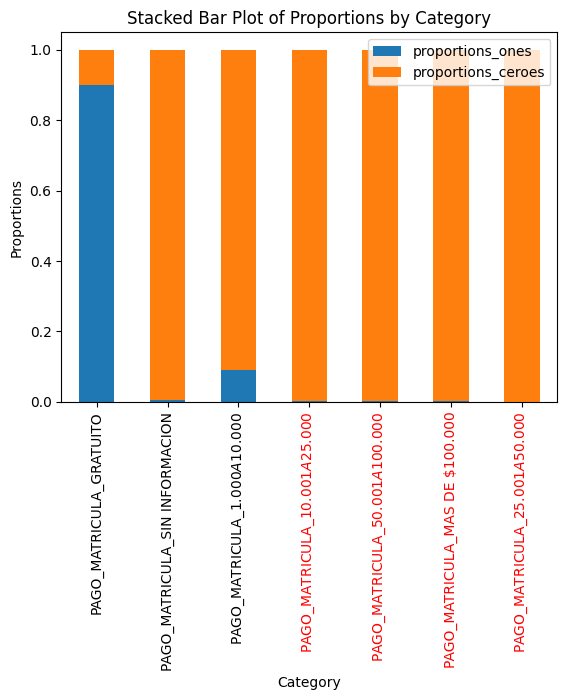

In [27]:
columns_to_show = [f'PAGO_MATRICULA_{pago}' for pago in pagos_matricula]

data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

[0.17560553633217993, 0.9948096885813149, 0.9922145328719724, 0.921280276816609, 0.9463667820069204, 0.9705882352941176, 0.9991349480968859]


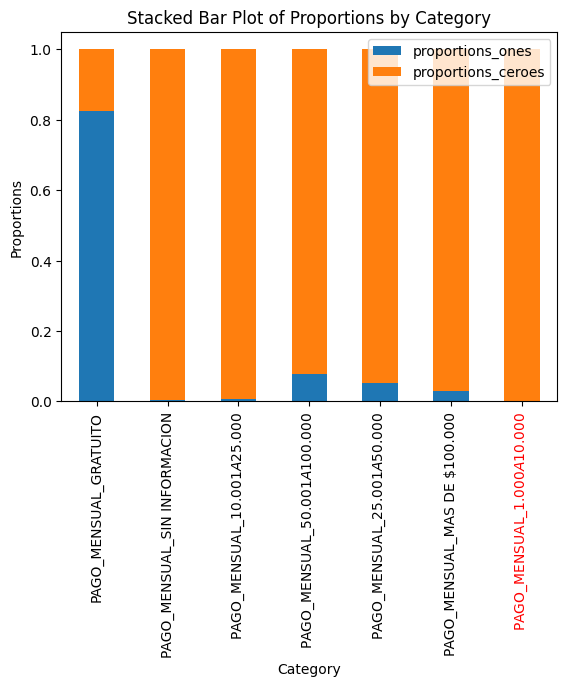

In [28]:
columns_to_show = [f'PAGO_MENSUAL_{pago}' for pago in pagos_mensual]

data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

[0.9256055363321799, 0.9602076124567474, 0.9775086505190311, 0.9619377162629758, 0.9100346020761245, 0.9731833910034602, 0.9818339100346021, 0.986159169550173, 0.9679930795847751, 0.9550173010380623, 0.9083044982698962, 0.9688581314878892, 0.9887543252595156, 0.9974048442906575, 0.9939446366782007, 0.9705882352941176, 0.9878892733564014, 0.9809688581314879, 0.9809688581314879, 0.9697231833910035, 0.9688581314878892, 0.9705882352941176, 0.9749134948096886, 0.96280276816609, 0.9576124567474048, 0.976643598615917, 0.9775086505190311, 0.96280276816609, 0.9801038062283737, 0.9679930795847751, 0.9645328719723183, 0.9887543252595156]


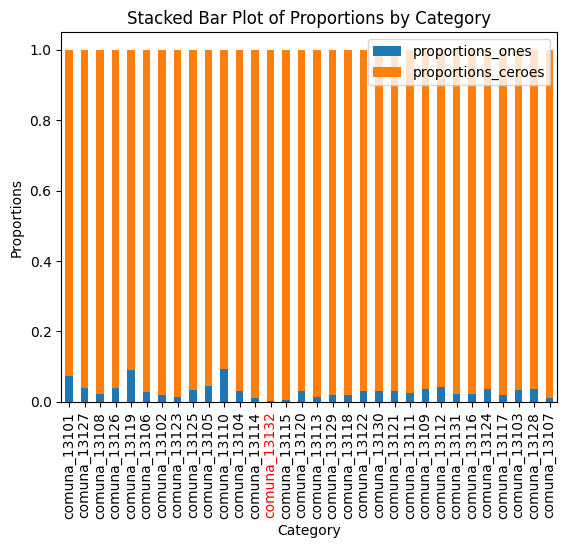

In [29]:
columns_to_show = [f'comuna_{comuna}' for comuna in cod_coms]

data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

[0.9576124567474048, 0.9740484429065744, 0.1980968858131488, 0.9576124567474048, 0.9740484429065744, 0.19636678200692043, 0.9524221453287197, 0.972318339100346, 0.05709342560553633, 0.9524221453287197, 0.9731833910034602, 0.05968858131487889, 0.9498269896193772, 0.972318339100346, 0.06314878892733564, 0.9498269896193772, 0.972318339100346, 0.058823529411764705, 0.9636678200692042, 0.9801038062283737, 0.1695501730103806, 0.9636678200692042, 0.9792387543252595, 0.185121107266436]


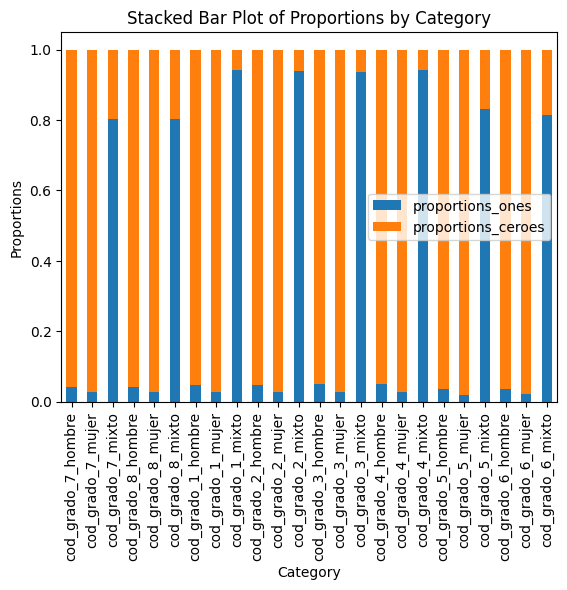

In [30]:
columns_to_show = df_establecimientos.columns[50:74]

data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

[0.5519031141868512, 0.2967128027681661, 0.21972318339100347]


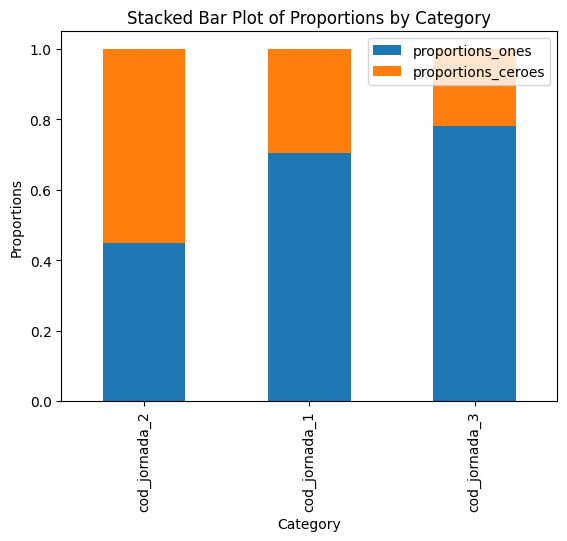

In [31]:
columns_to_show = df_establecimientos.columns[47:50]

data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

[0.08910034602076125, 0.5190311418685121, 0.9256055363321799, 0.21539792387543252, 0.8961937716262975, 0.8910034602076125, 0.9991349480968859, 0.0017301038062283738, 0.9602076124567474, 0.9913494809688581, 0.976643598615917, 0.9697231833910035, 0.9688581314878892, 0.9472318339100346, 0.9108996539792388, 0.9948096885813149, 0.9939446366782007, 0.9662629757785467, 0.9809688581314879, 0.9922145328719724, 0.9974048442906575, 0.9922145328719724, 0.9783737024221453, 0.9974048442906575, 0.9965397923875432, 0.9991349480968859, 0.995674740484429, 0.9974048442906575, 0.995674740484429, 0.9948096885813149, 0.9948096885813149, 0.9913494809688581, 0.9991349480968859, 0.9982698961937716, 0.9991349480968859]


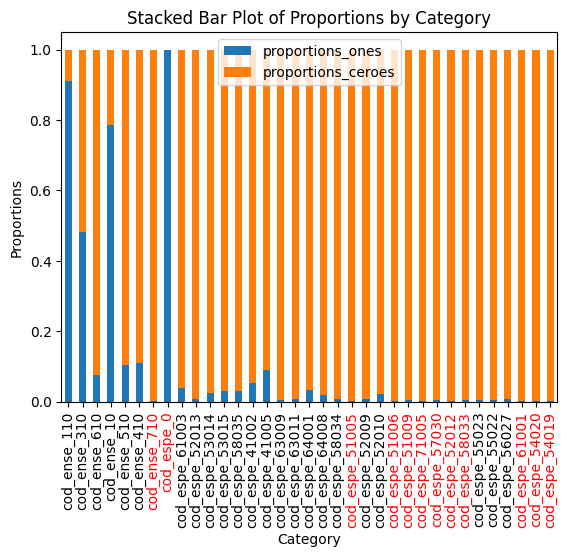

In [32]:
columns_to_show = df_establecimientos.columns[12:47]

data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

[1.0, 0.7076124567474048, 0.3875432525951557, 1.0, 0.32612456747404844, 0.7837370242214533, 0.9757785467128027, 1.0, 1.0, 1.0, 0.6790657439446367]


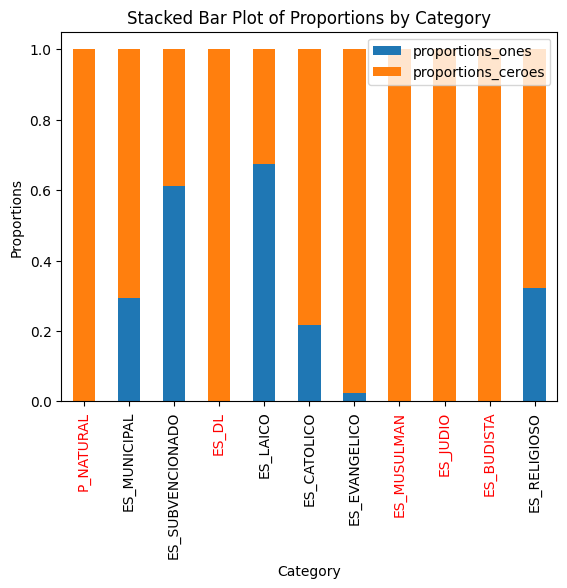

In [33]:
columns_to_show = ['P_NATURAL', 'ES_MUNICIPAL', 'ES_SUBVENCIONADO', 'ES_DL', 'ES_LAICO', 'ES_CATOLICO', 'ES_EVANGELICO', 'ES_MUSULMAN', 'ES_JUDIO', 'ES_BUDISTA', 'ES_RELIGIOSO']

data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

[0.995674740484429, 0.34342560553633217, 0.9247404844290658]


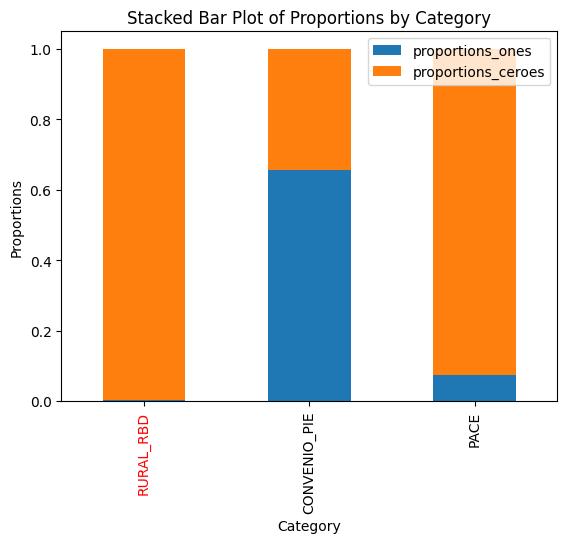

In [34]:
columns_to_show = ['RURAL_RBD','CONVENIO_PIE', 'PACE']


data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_establecimientos)
for column in columns_to_show:
  proportions_ones.append(len(df_establecimientos[df_establecimientos[column] == 1])/n)
  proportions_ceroes.append(len(df_establecimientos[df_establecimientos[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)
    if color == 'red':
      columnas_a_eliminar.append(label.get_text())

plt.show()

In [35]:
df_establecimientos.drop(columns=columnas_a_eliminar, inplace=True)

## Postulaciones

C:\Users\marti\AppData\Local\Temp\ipykernel_5016\2610811674.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


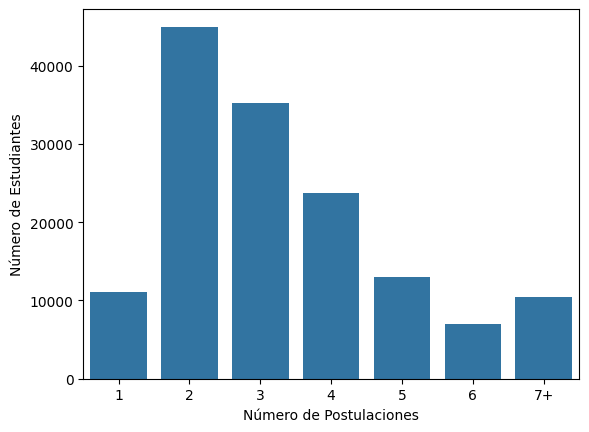

In [36]:
datos_a_graficar = df_postulaciones.groupby('mrun').count()['preferencia_postulante'].value_counts()
y = list(datos_a_graficar.values)[0:6]
y.append(datos_a_graficar[6:].values.sum())
x = list(datos_a_graficar.index[0:7])

ax = sns.barplot(x=x,  y=y)
ax.set_xlabel("Número de Postulaciones")
ax.set_ylabel("Número de Estudiantes")
labels = [str(i) for i in range(1,7)]
labels.append('7+')
ax.set_xticklabels(labels)
plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_5016\4005852446.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


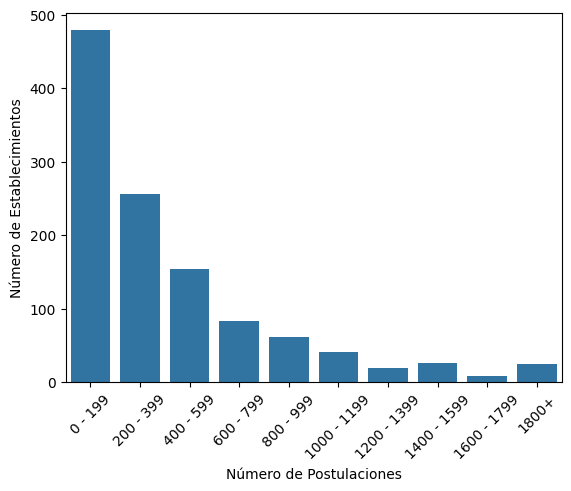

In [37]:
datos_a_graficar = df_postulaciones.groupby('rbd').count()['preferencia_postulante'].value_counts().sort_index()
n_actual = 0
suma = 0
valores = []
labels = []
ultimo_i = 0
for i in datos_a_graficar.index:
  if i < 1800:
    if i <= n_actual + 199:
      suma += datos_a_graficar[i]
    else:
      valores.append(suma)
      labels.append(f'{n_actual} - {n_actual+199}')
      suma = datos_a_graficar[i]
      n_actual += 200
  else:
    ultimo_i = i
    break
valores.append(suma)
labels.append(f'{n_actual} - {n_actual+199}')
valores.append(sum(datos_a_graficar.loc[ultimo_i:]))
labels.append('1800+')
ax = sns.barplot(x=range(len(valores)),  y=valores)
ax.set_xlabel("Número de Postulaciones")
ax.set_ylabel("Número de Establecimientos")
ax.set_xticklabels(labels, rotation=45)
plt.show()

## Postulantes

In [38]:
df_postulantes.columns

Index(['MRUN', 'cod_nivel', 'es_mujer', 'prioritario', 'alto_rendimiento',
       'lat_con_error', 'lon_con_error', 'calidad_georef', 'EDAD_ALU',
       'COD_COM_ALU', 'NOM_COM_ALU'],
      dtype='object')

In [39]:
df_postulantes.describe()

,MRUN,cod_nivel,es_mujer,prioritario,alto_rendimiento,lat_con_error,lon_con_error,calidad_georef,EDAD_ALU,COD_COM_ALU
count,1.453690e+05,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000
mean,1.987273e+07,4.593407,0.500554,0.531922,0.110278,-33.506391,-70.696288,1.421128,7.694515,10099.705357
std,8.643695e+06,4.236980,0.500001,0.498982,0.313237,0.730258,0.320990,0.989905,5.715279,5465.426276
min,5.380000e+02,-1.000000,0.000000,0.000000,0.000000,-54.934671,-109.440793,1.000000,-1.000000,-1.000000
25%,1.310697e+07,0.000000,0.000000,0.000000,0.000000,-33.524225,-70.730776,1.000000,4.000000,13101.000000
50%,2.548909e+07,5.000000,1.000000,1.000000,0.000000,-33.469658,-70.669548,1.000000,8.000000,13110.000000
75%,2.662198e+07,9.000000,1.000000,1.000000,0.000000,-33.423285,-70.628552,1.000000,13.000000,13124.000000
max,2.763719e+07,12.000000,1.000000,1.000000,1.000000,-18.424640,-67.603943,5.000000,39.000000,16305.000000


[0.4994462368180286, 0.4680777882492141, 0.8897220177616961]


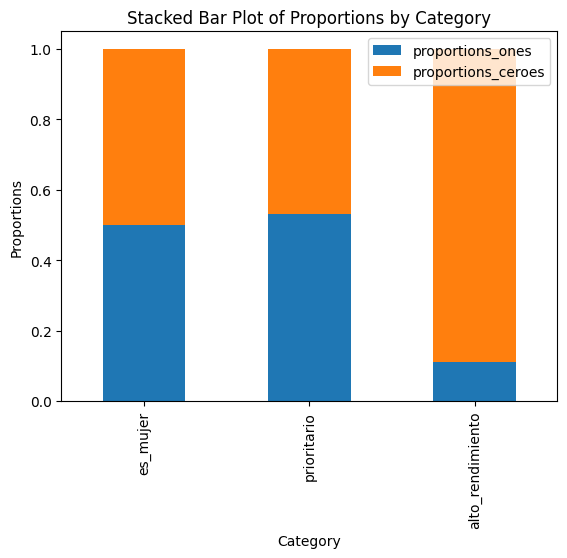

In [40]:
columns_to_show  = ['es_mujer','prioritario', 'alto_rendimiento']


data = {
    'category':  columns_to_show
}

proportions_ones = []
proportions_ceroes = []
n = len(df_postulantes)
for column in columns_to_show:
  proportions_ones.append(len(df_postulantes[df_postulantes[column] == 1])/n)
  proportions_ceroes.append(len(df_postulantes[df_postulantes[column] == 0])/n)

data['proportions_ones'] = proportions_ones
data['proportions_ceroes'] = proportions_ceroes

print(proportions_ceroes)
data =pd.DataFrame(data)

data.set_index('category', inplace=True)

ax = data.plot(kind='bar', stacked=True)

ax.set_ylabel('Proportions')
ax.set_xlabel('Category')
ax.set_title('Stacked Bar Plot of Proportions by Category')

x_labels = data.index.tolist()
x_label_colors = []
for idx in data.index:
    if any(data.loc[idx] < 0.005):
        x_label_colors.append('red')
    else:
        x_label_colors.append('black')

ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='center')

for label, color in zip(ax.get_xticklabels(), x_label_colors):
    label.set_color(color)

plt.show()

<Axes: >

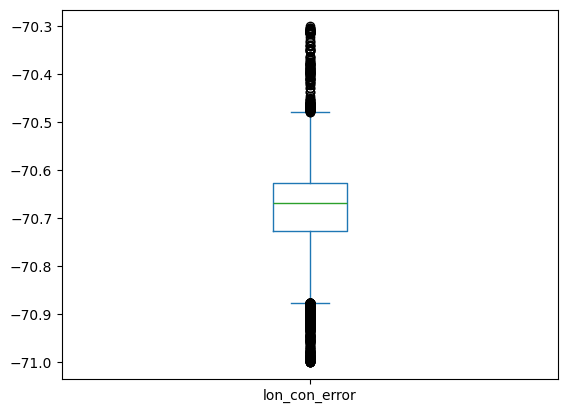

In [41]:
df_postulantes[(df_postulantes['lon_con_error'] > -71) & (df_postulantes['lon_con_error'] < -70.3)]['lon_con_error'].plot(kind='box')

<Axes: >

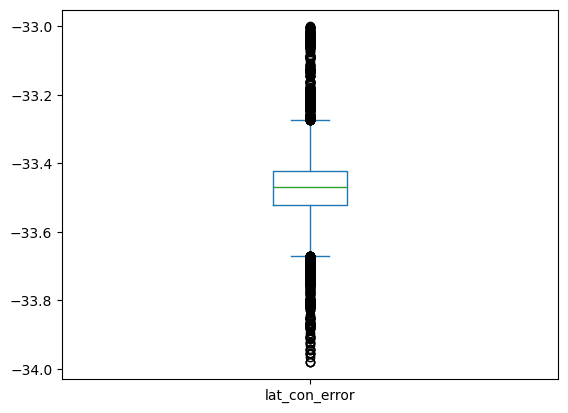

In [42]:
df_postulantes[(df_postulantes['lat_con_error'] > -34) & (df_postulantes['lat_con_error'] < -33)]['lat_con_error'].plot(kind='box')

<Axes: >

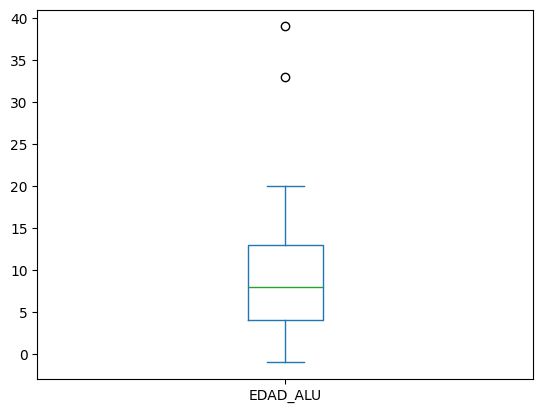

In [43]:
df_postulantes[['EDAD_ALU']].plot(kind='box')

# Guardar datos generados

In [44]:
df_establecimientos['LATITUD'] = df_establecimientos['LATITUD'].str.replace(',','.').astype(float)
df_establecimientos['LONGITUD'] = df_establecimientos['LONGITUD'].str.replace(',','.').astype(float)

df_establecimientos_features = df_establecimientos.drop(columns=['NOM_RBD','NOM_COM_RBD','NOM_DEPROV_RBD', 'PAGO_MENSUAL', 'PAGO_MATRICULA'])
df_establecimientos_informacion = df_establecimientos[['RBD','NOM_RBD','NOM_COM_RBD','NOM_DEPROV_RBD', 'LATITUD', 'LONGITUD']]

In [46]:
df_postulantes.to_csv('DataProcesada/postulantes_procesados.csv')
df_establecimientos_features.to_csv('DataProcesada/establecimientos_procesados.csv')
df_establecimientos_informacion.to_csv('DataProcesada/informacion_establecimientos.csv')
df_postulaciones.to_csv('DataProcesada/postulaciones.csv')
df_postulaciones_training.to_csv('DataProcesada/postulaciones_training.csv')
df_postulaciones_test.to_csv('DataProcesada/postulaciones_testing.csv')